<a href="https://colab.research.google.com/github/praneethalla/project/blob/main/applestockproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-20-243fb5e3b9eb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


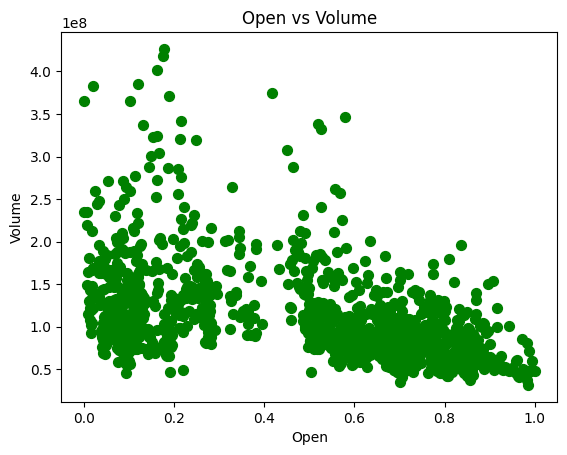

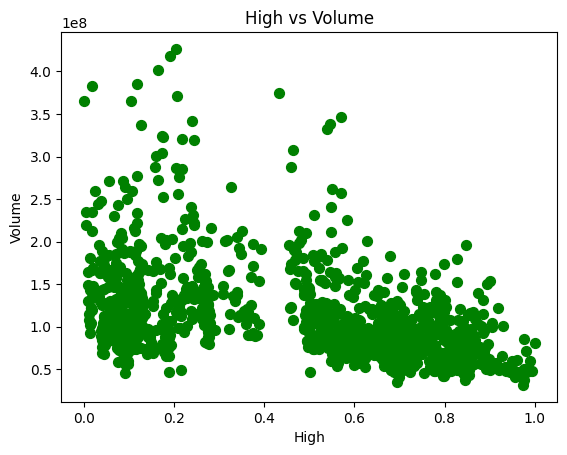

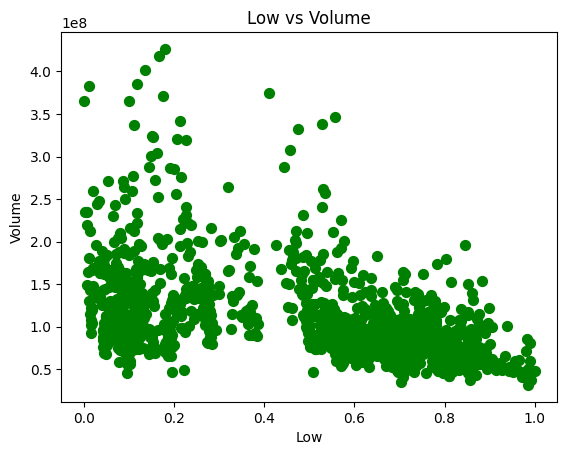

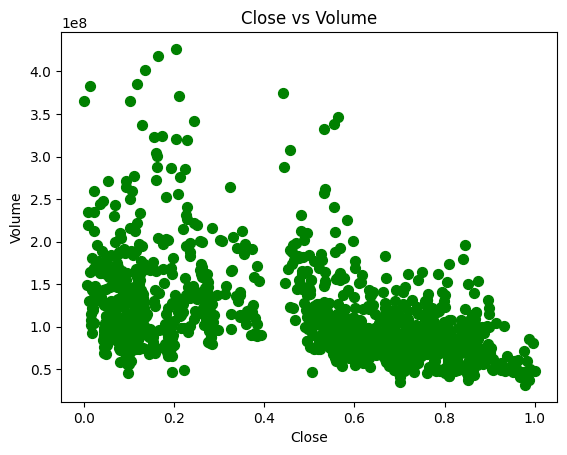

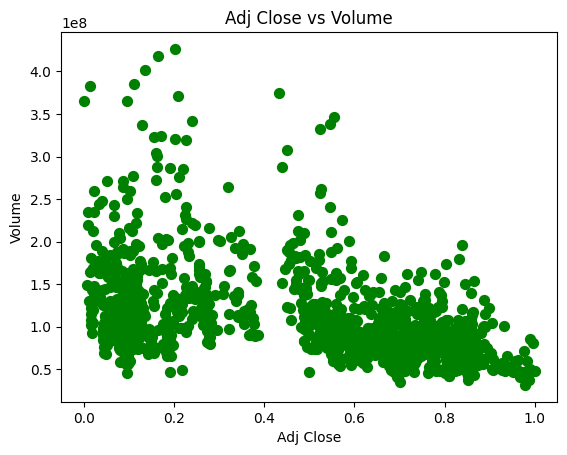

Volume = 139523359.42 + -340731391.04 * Open + 3567225058.70 * High + -2664761801.33 * Low + 2007378736.36 * Close + -2658429229.24 * Adj Close
Mean Absolute Error (MAE): 29037992.72


Mean Squared Error (MSE): 2013338338794468.75


Root Mean Squared Error (RMSE): 44870238.90




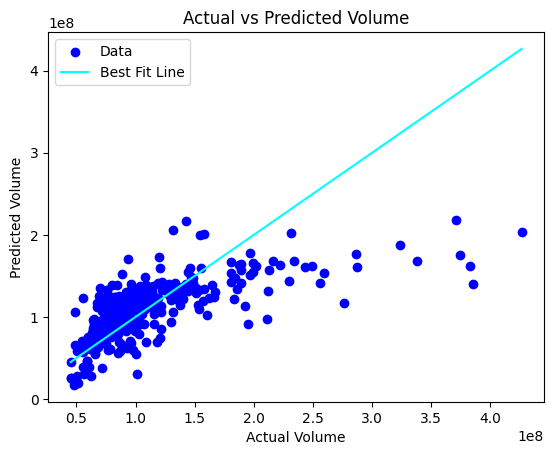

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load data
data = pd.read_csv('/content/AAPL.csv')
data.fillna(data.mean(), inplace=True)

# Select features and target
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close']]
target = data['Volume']

# Min-Max scaling for features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Plot scatter plots
for i, feature in enumerate(features.columns):
    plt.scatter(scaled_features[:, i], target, c='green', s=50)
    plt.xlabel(feature)
    plt.ylabel('Volume')
    plt.title(f'{feature} vs Volume')
    plt.show()


X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.25, random_state=23)


def linear_regression(X, y):
    X_transpose = X.T
    coefficients = np.linalg.inv(X_transpose @ X) @ X_transpose @ y
    return coefficients

X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
y_train = y_train.to_numpy()

coefficients = linear_regression(X_train, y_train)

X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))
y_pred = X_test @ coefficients



# Extract coefficients
intercept = coefficients[0]
feature_coefficients = coefficients[1:]

# Create the linear regression equation string
equation = f'Volume = {intercept:.2f}'

for i, feature in enumerate(features.columns):
    equation += f' + {feature_coefficients[i]:.2f} * {feature}'

# Print the linear regression equation
print(equation)




# Calculate Mean Absolute Error (MAE)
def mean_absolute_error(y_true, y_pred):
    n = len(y_true)
    mae = sum(abs(y_true - y_pred)) / n
    return mae

# Calculate Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    mse = sum((y_true - y_pred) ** 2) / n
    return mse

# Calculate Root Mean Squared Error (RMSE)
def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    return rmse

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

# Print the error metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}\n\n')
print(f'Mean Squared Error (MSE): {mse:.2f}\n\n')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}\n\n')



# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, c='blue', label='Data')
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Actual vs Predicted Volume')

# Create the best fit line
x_values = np.linspace(min(y_test), max(y_test), len(y_test))
y_values = x_values  # A perfect fit line where actual = predicted
plt.plot(x_values, y_values, c='aqua', linestyle='-', label='Best Fit Line')

plt.legend()
plt.show()


input_features = []
for feature in features.columns:
    value = float(input(f"Enter the {feature}: "))
    input_features.append(value)

# Scale the input features using the same scaler
scaled_input = scaler.transform([input_features])

# Add a bias term (intercept) to the input
scaled_input_with_bias = np.insert(scaled_input, 0, 1.0)

# Predict the volume
predicted_volume = scaled_input_with_bias @ coefficients

# Print the predicted volume
print(f'Predicted Volume: {predicted_volume:.2f}')




In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR  # Support Vector Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess your data
data = pd.read_csv('/content/AAPL.csv')
data.fillna(data.mean(), inplace=True)

# Select features and target
features = data[['Open', 'High', 'Low', 'Close', 'Adj Close']]
target = data['Volume']

# Min-Max scaling for features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.25, random_state=23)

# Train an SVR model
svr = SVR(kernel='linear')  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly')
svr.fit(X_train, y_train)

# Make predictions using the SVR model
y_pred = svr.predict(X_test)

# Evaluate the SVR model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


# Print the regression performance metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


user_input = []
for feature in features.columns:
    value = float(input(f"Enter the {feature}: "))
    user_input.append(value)

# Scale the user input
scaled_user_input = scaler.transform([user_input])

# Predict the volume based on user input
predicted_volume = svr.predict(scaled_user_input)

# Print the predicted volume
print(f'Predicted Volume: {predicted_volume[0]:.2f}')

<ipython-input-18-418ee7027a59>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Mean Absolute Error (MAE): 38964057.78
Mean Squared Error (MSE): 4016574308773888.00
Root Mean Squared Error (RMSE): 63376449.17
Enter the Open: 1
Enter the High: 2
Enter the Low: 3
Enter the Close: 4
Enter the Adj Close: 5
Predicted Volume: 94626044.73


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
